In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dados = datasets.load_breast_cancer()

In [3]:
dfL = pd.DataFrame(dados.data, columns=dados.feature_names)
dfL['diagnostico'] = dados.target

In [4]:
dfL

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostico
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
(dfL['diagnostico'] == 1).sum(), (dfL['diagnostico'] == 0).sum()

(357, 212)

## Balanceamento

In [6]:
diferenca = (dfL['diagnostico'] == 1).sum() - (dfL['diagnostico'] == 0).sum()
diferenca

145

In [7]:
df0 = dfL[dfL['diagnostico'] == 0]

In [8]:
dfB = pd.concat([df0.sample(n=diferenca, random_state=42), dfL], 
                ignore_index=True)

In [9]:
(dfB['diagnostico'] == 1).sum(), (dfB['diagnostico'] == 0).sum()

(357, 357)

## Normalização

In [10]:
dfB_ = dfB.drop('diagnostico', axis=1)

In [11]:
dfBN = (dfB_ - dfB_.min()) /(dfB_.max() - dfB_.min())

In [12]:
dfBN['diagnstico'] = dfB['diagnostico']
dfBN.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnstico
0,0.581618,0.566791,0.581231,0.432025,0.373567,0.467824,0.388238,0.377386,0.400505,0.266428,...,0.503198,0.552767,0.400069,0.526514,0.612888,0.486502,0.613402,0.415336,0.375574,0
1,0.517251,0.382482,0.557045,0.360764,0.635280,0.730691,0.747188,0.595427,0.531818,0.446293,...,0.420043,0.493999,0.274971,0.766889,0.547593,0.721565,0.674914,0.331165,0.424767,0
2,0.518198,0.499493,0.493470,0.362842,0.324276,0.156095,0.133529,0.235785,0.241414,0.108256,...,0.604211,0.421784,0.278903,0.398402,0.148742,0.166134,0.390378,0.185098,0.160304,0


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [14]:
scaler.fit(dfB_)

StandardScaler()

In [15]:
ndarrayBS = scaler.transform(dfB_)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()

In [17]:
scaler2.fit_transform(dfB_)

array([[0.58161768, 0.56679067, 0.58123143, ..., 0.61340206, 0.41533609,
        0.37557392],
       [0.51725117, 0.38248225, 0.55704512, ..., 0.67491409, 0.33116499,
        0.42476715],
       [0.51819774, 0.49949273, 0.4934697 , ..., 0.39037801, 0.18509758,
        0.16030434],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

## Feature Selection

In [18]:
dfBN.corrwith(dfBN['diagnstico']).sort_values(ascending=False)

diagnstico                 1.000000
smoothness error           0.089665
texture error              0.029264
mean fractal dimension     0.010022
symmetry error             0.002596
fractal dimension error   -0.078679
concavity error           -0.276361
compactness error         -0.295897
worst fractal dimension   -0.325711
mean symmetry             -0.333257
mean smoothness           -0.368094
concave points error      -0.410809
worst symmetry            -0.416742
mean texture              -0.423686
worst smoothness          -0.431949
worst texture             -0.470168
perimeter error           -0.533407
area error                -0.534493
radius error              -0.548382
worst compactness         -0.580678
mean compactness          -0.587287
worst concavity           -0.666895
mean concavity            -0.687196
mean area                 -0.689127
worst area                -0.704212
mean radius               -0.719052
mean perimeter            -0.731185
worst radius              -0

In [19]:
import seaborn as sns

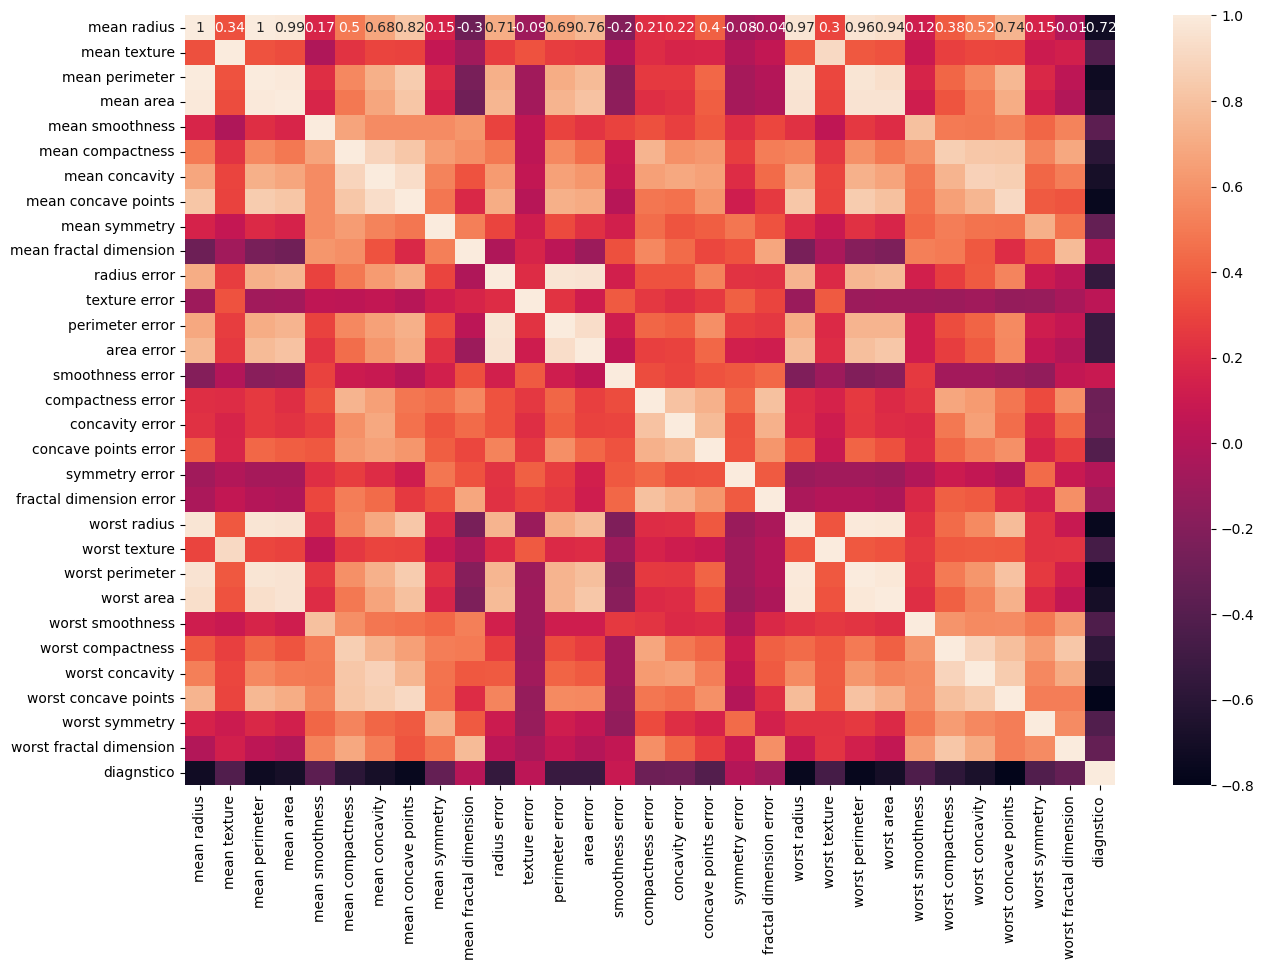

In [20]:
plt.figure(figsize=(15,10))

correlation_matrix = dfBN.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True);

In [21]:
dfBNS = dfBN[['worst concave points', 'worst perimeter',
             'mean concave points', 'worst radius', 'mean perimeter']]

# Treinamento

In [22]:
X = dfBNS
y = dfBN['diagnstico']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.1, random_state=42)

In [25]:
from sklearn.linear_model import SGDClassifier

In [26]:
sgd_clf = SGDClassifier(random_state=42)

In [27]:
sgd_clf.fit(Xtr, ytr)

SGDClassifier(random_state=42)

In [28]:
from sklearn.metrics import confusion_matrix 

In [29]:
ypred = sgd_clf.predict(Xtr) 

In [30]:
confusion_matrix(ytr, ypred)

array([[306,  12],
       [ 16, 308]], dtype=int64)

In [31]:
sgd_clf.score(Xtr, ytr)

0.956386292834891

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
cross_val_score(sgd_clf, Xtr, ytr, cv=3, scoring='accuracy')

array([0.96261682, 0.94859813, 0.94859813])